In [2]:
# Kết nối với Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import thư viện cần thiết**

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

**Đọc file Excel**

In [4]:
file_path = '/content/drive/MyDrive/TunaAnn_Data/Dataset thông số cá.xlsx'
df = pd.read_excel(file_path)

# Xem trước vài dòng dữ liệu
print("In ra dữ liệu mẫu:")
df.head()

In ra dữ liệu mẫu:


,Ngày đo,Cube cá,Vị trí mặt,L*,a*,b*,MetMb,TBARS,Peroxide,R,G,B,R_255,G_255,B_255
0,12-2,CO 1.1,Mặt 1,30.59,15.40,3.10,55.66,4.39,1.61,0.378396,0.246947,0.265552,96,63,68
1,NaN,CO 1.1,Mặt 2,28.54,15.54,3.94,55.20,4.04,1.53,0.360681,0.228049,0.242343,92,58,62
2,NaN,CO 1.1,Mặt 3,29.70,14.76,2.78,55.34,4.30,1.57,0.365766,0.240718,0.259425,93,61,66
3,NaN,CO 1.1,Mặt 4,27.97,14.12,2.26,54.80,4.18,1.50,0.344750,0.227105,0.247059,88,58,63
4,NaN,CO 1.1,Mặt 5,31.21,16.68,3.92,56.14,4.27,1.65,0.392693,0.248921,0.266360,100,63,68


**Tiền xử lý dữ liệu (tách Lab và RGB)**

In [5]:
# Lấy dữ liệu L*a*b*
df_lab = df[["L*", "a*", "b*", "MetMb", "TBARS", "Peroxide"]].dropna()
X_lab = df_lab[["L*", "a*", "b*"]].values
y_lab = df_lab[["MetMb", "TBARS", "Peroxide"]].values

# Lấy dữ liệu RGB
df_rgb = df[["R_255", "G_255", "B_255", "MetMb", "TBARS", "Peroxide"]].dropna()
X_rgb = df_rgb[["R_255", "G_255", "B_255"]].values
y_rgb = df_rgb[["MetMb", "TBARS", "Peroxide"]].values


**Hàm huấn luyện mô hình ANN**

In [6]:
def build_and_train_ann(X, y, name="Model"):
    global X_test, y_test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = Sequential([
        Input(shape=(3,)),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3)  # MetMb, TBARS, Peroxide
    ])
    model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16, verbose=1) # verbose=1 để hiển thị chi tiết từng dòng epochs
    return model, history


**Huấn luyện mô hình LAB và RGB**

In [7]:
model_lab, history_lab = build_and_train_ann(X_lab, y_lab, name="L*a*b*")
model_rgb, history_rgb = build_and_train_ann(X_rgb, y_rgb, name="RGB")

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 1165.4047 - mae: 22.8867 - val_loss: 773.0964 - val_mae: 19.2146
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 685.0380 - mae: 18.1085 - val_loss: 444.2149 - val_mae: 14.5908
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 372.1237 - mae: 13.2215 - val_loss: 164.1886 - val_mae: 8.8227
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 118.8138 - mae: 7.1584 - val_loss: 18.8730 - val_mae: 2.5650
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 16.7119 - mae: 2.5870 - val_loss: 21.8285 - val_mae: 2.4472
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 15.7205 - mae: 2.0817 - val_loss: 13.7586 - val_mae: 2.1949
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 11.1802 - mae: 1.9431 - val_loss: 13.1705 - val_mae: 2.1032
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.1943 - mae: 1.9100 - val_loss: 13.1299 - val_mae: 2.1156
Epoch 9/100
14/14 ━━━━━━━━━

In [ ]:
# from sklearn.metrics import mean_absolute_percentage_error, r2_score

# # Dự đoán trên tập kiểm tra
# y_pred_lab = model_lab.predict(X_test)
# y_true_lab = y_test

# # Tính MAPE và R² cho từng chỉ số
# labels = ['metMb', 'TBARS', 'Peroxide']

# for i, label in enumerate(labels):
#     mape = mean_absolute_percentage_error(y_true_lab[:, i], y_pred_lab[:, i]) * 100
#     r2 = r2_score(y_true_lab[:, i], y_pred_lab[:, i])
#     print(f"{label} → MAPE: {mape:.2f}% → Độ chính xác ≈ {100 - mape:.2f}%, R² Score: {r2:.3f}")


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
metMb → MAPE: 110.91% → Độ chính xác ≈ -10.91%, R² Score: -1496.838
TBARS → MAPE: 59.80% → Độ chính xác ≈ 40.20%, R² Score: -29.504
Peroxide → MAPE: 205.98% → Độ chính xác ≈ -105.98%, R² Score: -310.162


**Hàm dự đoán linh hoạt**

In [8]:
def du_doan_chi_so(dau_vao, mode='lab'):
    dau_vao = np.array([dau_vao])
    if mode == 'lab':
        pred = model_lab.predict(dau_vao)[0]
    elif mode == 'rgb':
        pred = model_rgb.predict(dau_vao)[0]
    else:
        raise ValueError("Mode phải là 'lab' hoặc 'rgb'")
    return {
        'MetMb': round(pred[0], 2),
        'TBARS': round(pred[1], 2),
        'Peroxide': round(pred[2], 2)
    }

**Dự đoán mẫu thử**

In [9]:
lab_input = [30.59, 15.4, 3.1]
rgb_input = [92, 58, 62]

print("Kết quả dự đoán từ L*a*b*:", du_doan_chi_so(lab_input, mode='lab'))
print("Kết quả dự đoán từ RGB:", du_doan_chi_so(rgb_input, mode='rgb'))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Kết quả dự đoán từ L*a*b*: {'MetMb': np.float32(52.57), 'TBARS': np.float32(4.17), 'Peroxide': np.float32(1.62)}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Kết quả dự đoán từ RGB: {'MetMb': np.float32(47.25), 'TBARS': np.float32(3.75), 'Peroxide': np.float32(1.27)}


**Biểu đồ Loss**

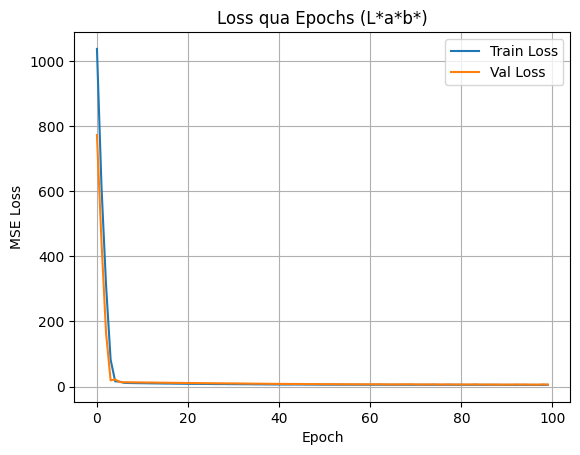

In [10]:
import matplotlib.pyplot as plt

# Biểu đồ loss L*a*b*
plt.plot(history_lab.history['loss'], label='Train Loss')
plt.plot(history_lab.history['val_loss'], label='Val Loss')
plt.title('Loss qua Epochs (L*a*b*)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()


**So sánh dự đoán với dữ liệu thực tế**

In [11]:
# So sánh toàn bộ dự đoán với dữ liệu gốc
y_pred_lab_all = model_lab.predict(X_lab)

df_compare = pd.DataFrame({
    "L*": df_lab["L*"].values,
    "a*": df_lab["a*"].values,
    "b*": df_lab["b*"].values,
    "MetMb_ThucTe": y_lab[:, 0],
    "MetMb_DuDoan": y_pred_lab_all[:, 0],
    "TBARS_ThucTe": y_lab[:, 1],
    "TBARS_DuDoan": y_pred_lab_all[:, 1],
    "Peroxide_ThucTe": y_lab[:, 2],
    "Peroxide_DuDoan": y_pred_lab_all[:, 2]
})

# Hiển thị 10 dòng đầu tiên
df_compare.round(2).head(10)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


,L*,a*,b*,MetMb_ThucTe,MetMb_DuDoan,TBARS_ThucTe,TBARS_DuDoan,Peroxide_ThucTe,Peroxide_DuDoan
0,30.59,15.40,3.10,55.66,52.570000,4.39,4.17,1.61,1.62
1,28.54,15.54,3.94,55.20,48.470001,4.04,3.71,1.53,1.53
2,29.70,14.76,2.78,55.34,51.419998,4.30,4.10,1.57,1.58
3,27.97,14.12,2.26,54.80,49.529999,4.18,3.93,1.50,1.50
4,31.21,16.68,3.92,56.14,53.020000,4.27,4.09,1.65,1.65
5,31.75,14.76,2.24,55.92,55.049999,4.62,4.56,1.65,1.61
6,29.65,15.46,2.09,55.54,53.139999,4.29,4.16,1.58,1.57
7,35.51,25.10,8.16,58.94,59.009998,3.91,3.81,1.92,1.90
8,42.08,27.49,10.19,61.14,66.690002,4.47,4.62,2.23,2.19
9,40.87,26.69,9.61,60.68,65.230003,4.37,4.51,2.16,2.13


**Lưu mô hình**

In [12]:
model_lab.save('/content/drive/MyDrive/TunaAnn_Data/model_ann_lab.h5')
model_rgb.save('/content/drive/MyDrive/TunaAnn_Data/model_ann_rgb.h5')

print("Đã lưu mô hình ANN thành công")

Đã lưu mô hình ANN thành công


# **Cài đặt Gradio**

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.1 MB/s eta 0:00:00


# **Tạo giao diện Gradio**

In [ ]:
import gradio as gr
import numpy as np
from skimage import color

# Hàm chuyển RGB (0-255) sang L*a*b*
def rgb_to_lab(rgb):
    rgb_norm = np.array(rgb) / 255.0
    rgb_norm = rgb_norm.reshape(1, 1, 3)
    lab = color.rgb2lab(rgb_norm)
    return lab[0][0].tolist()

# Hàm chuyển L*a*b* sang RGB (0-255)
def lab_to_rgb(lab):
    lab = np.array(lab).reshape(1, 1, 3)
    rgb_norm = color.lab2rgb(lab)
    rgb = (rgb_norm[0][0] * 255).clip(0, 255).astype(int)
    return rgb.tolist()


# Hàm dự đoán kết quả (sử dụng model đã huấn luyện)
def du_doan_chi_so(dau_vao, mode='lab'):
    dau_vao = np.array([dau_vao])
    if mode == 'lab':
        pred = model_lab.predict(dau_vao)[0]
        converted = lab_to_rgb(dau_vao[0])
        converted_value = {
            "R": converted[0],
            "G": converted[1],
            "B": converted[2]
        }
    elif mode == 'rgb':
        pred = model_rgb.predict(dau_vao)[0]
        converted = rgb_to_lab(dau_vao[0])
        converted_value = {
            "L*": round(converted[0], 2),
            "a*": round(converted[1], 2),
            "b*": round(converted[2], 2)
        }
    else:
        raise ValueError("Mode phải là 'lab' hoặc 'rgb'")
    return {
        'MetMb': round(pred[0], 2),
        'TBARS': round(pred[1], 2),
        'Peroxide': round(pred[2], 2),
        'GiaTriChuyenDoi': converted_value
    }

# Tạo giao diện nhập với Gradio
def predict_quality(lab_input, mode):
    lab_input = [float(x) for x in lab_input.split(',')]  # Chuyển chuỗi nhập thành list số
    return du_doan_chi_so(lab_input, mode)

# Cải thiện giao diện: người dùng nhập L*a*b* hoặc RGB
inputs = [
    gr.Textbox(label='Nhập L*a*b* hoặc RGB (cách nhau bằng dấu phẩy)', value='30.59, 15.4, 3.1', placeholder="Nhập 3 giá trị cách nhau bằng dấu phẩy", lines=1),
    gr.Dropdown(choices=['lab', 'rgb'], label='Chọn loại đầu vào', interactive=True)
]
outputs = gr.JSON(label='Kết quả dự đoán')

# Cải thiện bố cục và giao diện Gradio
gr.Interface(fn=predict_quality, inputs=inputs, outputs=outputs, live=False,  # live=False để phải bấm nút Submit
             title="Dự đoán chất lượng cá ngừ",
             description="Nhập giá trị Lab hoặc RGB để nhận dự đoán các chỉ số MetMb, TBARS và Peroxide.",
             css=".gradio-container {background: linear-gradient(to right, #c2493e 20%, #987d3f 80%); padding: 30px; border-radius: 10px;} .gradio-button {background-color: #4CAF50; color: white;} .gradio-input {border: 2px solid #4CAF50; border-radius: 5px;}").launch()


ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-10' coro=<Server.serve() done, defined at /usr/local/lib/python3.11/dist-packages/uvicorn/server.py:68> exception=KeyboardInterrupt()>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/main.py", line 580, in run
    server.run()
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/server.py", line 66, in run
    return asyncio.run(self.serve(sockets=sockets))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 30, in run
    return loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 92, in run_until_complete
    self._run_once()
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 133, in _run_once
    handle._run()
  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
    s

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8780cb75a1a26f505a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# **Cài đặt FastAPI và ngrok**

In [13]:
!pip install pyngrok
from pyngrok import ngrok
# Đặt authtoken
ngrok.set_auth_token("2vUmAR6crPBTDBlWZ9N3F5oKVAI_3C5wdci8hzh99tDWSB8FH")

# **Tạo FastAPI và ngrok**

**Cài đặt thư viện**

In [14]:
import nest_asyncio
from fastapi import FastAPI, HTTPException
from fastapi.middleware.cors import CORSMiddleware
from pydantic import BaseModel
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import MeanSquaredError
from skimage import color

**Khởi tạo FastAPI**

In [15]:
# Cài đặt nest_asyncio để hỗ trợ chạy trên Google Colab
nest_asyncio.apply()

# Tải mô hình đã huấn luyện
model_lab = load_model('/content/drive/MyDrive/TunaAnn_Data/model_ann_lab.h5', custom_objects={'mse': MeanSquaredError()})
model_rgb = load_model('/content/drive/MyDrive/TunaAnn_Data/model_ann_rgb.h5', custom_objects={'mse': MeanSquaredError()})

# Tạo FastAPI app
app = FastAPI()

# Thêm middleware CORS
app.add_middleware(
    CORSMiddleware,
    allow_origins= ["*"],  # * Cho phép tất cả domain (có thể chỉnh thành domain của React)
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

# Hàm chuyển RGB (0-255) sang L*a*b*
def rgb_to_lab(rgb):
    rgb_norm = np.array(rgb) / 255.0
    rgb_norm = rgb_norm.reshape(1, 1, 3)
    lab = color.rgb2lab(rgb_norm)
    return lab[0][0].tolist()

# Hàm chuyển L*a*b* sang RGB (0-255)
def lab_to_rgb(lab):
    lab = np.array(lab).reshape(1, 1, 3)
    rgb_norm = color.lab2rgb(lab)
    rgb = (rgb_norm[0][0] * 255).clip(0, 255).astype(int)
    return rgb.tolist()


# Hàm dự đoán kèm chuyển đổi qua lại giữa rgb và lab*
def du_doan_chi_so(dau_vao, mode='lab'):
    dau_vao = np.array([dau_vao])  # Chuyển thành array để đưa vào mô hình
    if mode == 'lab':  # Chuyển đổi qua RGB nếu người dùng chọn lab
        pred = model_lab.predict(dau_vao)[0]
        converted = lab_to_rgb(dau_vao[0])
        converted_value = {
            "R": int(converted[0]),
            "G": int(converted[1]),
            "B": int(converted[2])
        }
    elif mode == 'rgb':   # Chuyển đổi qua Lab* nếu người dùng chọn RGB
        pred = model_rgb.predict(dau_vao)[0]
        converted = rgb_to_lab(dau_vao[0])
        converted_value = {
            "L*": round(float(converted[0]), 2),
            "a*": round(float(converted[1]), 2),
            "b*": round(float(converted[2]), 2)
        }
    else:
        raise ValueError("Mode phải là 'lab' hoặc 'rgb'")
    return {
        'MetMb': round(float(pred[0]), 2),
        'TBARS': round(float(pred[1]), 2),
        'Peroxide': round(float(pred[2]), 2),
        'GiaTriChuyenDoi': converted_value   # in ra giá trị chuyển đổi
    }

# Tạo model yêu cầu dữ liệu đầu vào
class InputData(BaseModel):
    lab_input: list
    mode: str

# Route cho trang chủ
@app.get("/")
def read_root():
    return {"message": "API dự đoán chất lượng cá ngừ - Sử dụng POST /predict để nhận dự đoán"}

# API route dự đoán
@app.post("/predict")
async def predict(data: InputData):
    # Kiểm tra xem đầu vào có hợp lệ không
    if not data.lab_input or len(data.lab_input) != 3:
        raise HTTPException(status_code=400, detail="lab_input phải có 3 giá trị")

    lab_input = data.lab_input
    mode = data.mode

    # Kiểm tra mode hợp lệ
    if mode not in ['lab', 'rgb']:
        raise HTTPException(status_code=400, detail="Mode phải là 'lab' hoặc 'rgb'")

    # Dự đoán
    result = du_doan_chi_so(lab_input, mode)
    return result


**Kết nối ngrok**

In [16]:
from pyngrok import ngrok

# Kết nối ngrok tới cổng 8000
public_url = ngrok.connect(8000)
print(f"Ngrok tunnel 'http://127.0.0.1:8000' -> 'http://{public_url}'")

Ngrok tunnel 'http://127.0.0.1:8000' -> 'http://NgrokTunnel: "https://e575-34-23-37-179.ngrok-free.app" -> "http://localhost:8000"'


**Run fastAPI**

In [ ]:
import uvicorn

# Khởi động ứng dụng FastAPI bằng Uvicorn
uvicorn.run(app, host="0.0.0.0", port=8000)

INFO:     Started server process [268]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     118.69.120.4:0 - "OPTIONS /predict HTTP/1.1" 200 OK


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
INFO:     118.69.120.4:0 - "POST /predict HTTP/1.1" 200 OK
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
INFO:     118.69.120.4:0 - "POST /predict HTTP/1.1" 200 OK


In [ ]:
%%writefile main.py
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
from pyngrok import ngrok
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import MeanSquaredError
import nest_asyncio
import uvicorn
import os
import git


# Cài đặt nest_asyncio để hỗ trợ chạy trên Google Colab
nest_asyncio.apply()

# # Tải các mô hình đã huấn luyện
# model_lab = load_model('/content/drive/MyDrive/TunaAnn_Data/model_ann_lab.h5', custom_objects={'mse': MeanSquaredError()})
# model_rgb = load_model('/content/drive/MyDrive/TunaAnn_Data/model_ann_rgb.h5', custom_objects={'mse': MeanSquaredError()})

# Clone mô hình từ GitHub vào thư mục local
if not os.path.exists("models"):
    os.makedirs("models")
git.Repo.clone_from("https://github.com/Runchveenti/Grad-Project.git", "models")

# Tải mô hình
model_lab = load_model('models/model_ann_lab.h5', custom_objects={'mse': MeanSquaredError()})
model_rgb = load_model('models/model_ann_rgb.h5', custom_objects={'mse': MeanSquaredError()})
# Tạo FastAPI app
app = FastAPI()

# Hàm dự đoán
def du_doan_chi_so(dau_vao, mode='lab'):
    dau_vao = np.array([dau_vao])  # Chuyển thành array để đưa vào mô hình
    if mode == 'lab':
        pred = model_lab.predict(dau_vao)[0]
    elif mode == 'rgb':
        pred = model_rgb.predict(dau_vao)[0]
    else:
        raise ValueError("Mode phải là 'lab' hoặc 'rgb'")
    return {
        'MetMb': round(float(pred[0]), 2),
        'TBARS': round(float(pred[1]), 2),
        'Peroxide': round(float(pred[2]), 2)
    }

# Tạo model yêu cầu dữ liệu đầu vào
class InputData(BaseModel):
    lab_input: list
    mode: str

# Route cho trang chủ
@app.get("/")
def read_root():
    return {"message": "API dự đoán chất lượng cá ngừ - Sử dụng POST /predict để nhận dự đoán"}

# API route dự đoán
@app.post("/predict")
async def predict(data: InputData):
    # Kiểm tra xem đầu vào có hợp lệ không
    if not data.lab_input or len(data.lab_input) != 3:
        raise HTTPException(status_code=400, detail="lab_input phải có 3 giá trị")

    lab_input = data.lab_input
    mode = data.mode

    # Kiểm tra mode hợp lệ
    if mode not in ['lab', 'rgb']:
        raise HTTPException(status_code=400, detail="Mode phải là 'lab' hoặc 'rgb'")

    # Dự đoán
    result = du_doan_chi_so(lab_input, mode)
    return result




Overwriting main.py


# **Cấu hình Git**

In [17]:
!git config --global user.name "Runchveenti"
!git config --global user.email "nguyenngocanhthufpt77@gmail.com"

# **Clone Repository vào Colab**

In [24]:
!git clone https://github.com/Runchveenti/Grad-Project.git

fatal: destination path 'Grad-Project' already exists and is not an empty directory.


In [26]:
%cd /content/Grad-Project
!git status

/content/Grad-Project
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


# **Tìm các file .ipynb có trong Drive**

In [21]:
!find /content/drive/MyDrive -name "*.ipynb"

/content/drive/MyDrive/Colab Notebooks/Tuna_ANN_Pipeline.ipynb
/content/drive/MyDrive/Colab Notebooks/Data Science.ipynb
/content/drive/MyDrive/Colab Notebooks/Untitled0.ipynb
/content/drive/MyDrive/Colab Notebooks/Untitled1.ipynb
/content/drive/MyDrive/Colab Notebooks/Tuna_ANN.ipynb
/content/drive/MyDrive/Colab Notebooks/Tuna Data.ipynb
/content/drive/MyDrive/Colab Notebooks/Tuna_CNN.ipynb
/content/drive/MyDrive/Colab Notebooks/Test_model.ipynb
/content/drive/MyDrive/Colab Notebooks/Predict_RGB.ipynb
^C


# **Copy file colab vào Repo**

In [25]:
!cp "/content/drive/MyDrive/Tuna_ANN_Pipeline.ipynb" /content/Grad-Project/


cp: cannot stat '/content/drive/MyDrive/Tuna_ANN_Pipeline.ipynb': No such file or directory
